In [76]:
import numpy as np
import matplotlib.pyplot as plt
from fears.population import Population
from fears.utils import pharm

options = {
    'mut_rate':0.5*10**-8,
    'fitness_data':'from_file',
    'use_carrying_cap':True,
    'carrying_cap':10**8,
    'dwell':True,
    'dwell_time':24*2,
    'death_model':'pharmacodynamic',
    'n_timestep':300,
    'plot':False,
    'regimen_length':7*24,
    'max_dose':50,
    'dose_schedule':8,
    'n_sims':1,
    'curve_type':'pulsed'
}

p = Population(**options)

# tmax = np.linspace(1,20,5)
# thalf = np.linspace(1,20,5)
tmax = np.array([1,5,10,15,20])
thalf = np.array([1,5,10,15,20])

p_forget = np.linspace(0,0.8,5)

res = np.zeros((len(tmax),len(thalf),len(p_forget)))

# fig,ax = plt.subplots()

for i,tm in enumerate(tmax):
    for j,th in enumerate(thalf):
        ka,ke = pharm.est_pharm_params(th,tm)

        for k,pf in enumerate(p_forget):
            for sim in range(10):
                p.reset_drug_conc_curve(k_elim=ke,k_abs=ka,prob_drop=pf)

                counts,et = p.simulate()

                if np.sum(counts[-1]) < 1:
                    res[i,j,k] += 1



In [77]:
res = res/10

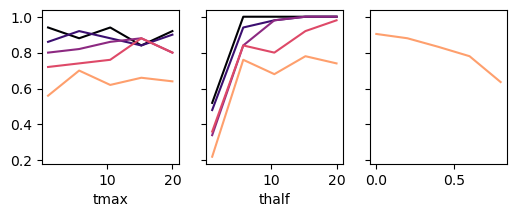

In [78]:
cmap = plt.get_cmap('magma')

# res dimensions: tmax, thalf, p_forget

fig,ax_list = plt.subplots(ncols=3,figsize=(6,2),sharey=True)

for i,p in enumerate(p_forget):

    ax = ax_list[0]

    ax.plot(tmax,res[:,:,i].mean(axis=1),label=p,c=cmap(i/len(p_forget)))

    ax.set_xlabel('tmax')

    ax = ax_list[1]

    ax.plot(thalf,res[:,:,i].mean(axis=0),label=p,c=cmap(i/len(p_forget)))

    ax.set_xlabel('thalf')

ax = ax_list[2]

ax.plot(p_forget,res.mean(axis=(0,1)),label=p,c=cmap(i/(len(p_forget))))

# ax_list[0].legend(frameon=False)

In [98]:
vmin = 1
vmax = 0

for i in range(3):
    min = res.mean(axis=i).min()
    max = res.mean(axis=i).max()

    if min < vmin:
        vmin = min
    
    if max > vmax:
        vmax = max


0.21999999999999997 1.0


/var/folders/zc/70qypfn92xg4qzzd0ldt5ks80000gn/T/ipykernel_57059/3634219783.py:49: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


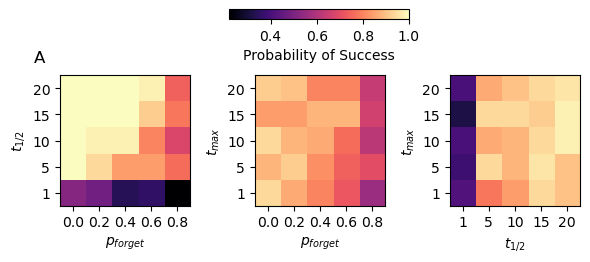

In [129]:
cmap = plt.get_cmap('viridis')

# res dimensions: tmax, thalf, p_forget
cmap = 'magma'

fig,ax_list = plt.subplots(ncols=3,figsize=(6,2))

ax = ax_list[0]
ax.imshow(res.mean(axis=0),cmap=cmap,origin='lower',vmin=vmin,vmax=vmax)

ax.set_yticks(np.arange(len(thalf)))
ax.set_yticklabels(thalf)

ax.set_xticks(np.arange(len(p_forget)))
ax.set_xticklabels(np.round(p_forget,1))

ax.set_ylabel('$t_{1/2}$')
ax.set_xlabel('$p_{forget}$')

ax = ax_list[1]
ax.imshow(res.mean(axis=1),cmap=cmap,origin='lower',vmin=vmin,vmax=vmax)

ax.set_yticks(np.arange(len(tmax)))
ax.set_yticklabels(tmax)

ax.set_xticks(np.arange(len(p_forget)))
ax.set_xticklabels(np.round(p_forget,1))

ax.set_ylabel('$t_{max}$')
ax.set_xlabel('$p_{forget}$')

ax = ax_list[2]
im = ax.imshow(res.mean(axis=2),cmap=cmap,origin='lower',vmin=vmin,vmax=vmax)

ax.set_yticks(np.arange(len(tmax)))
ax.set_yticklabels(tmax)

ax.set_xticks(np.arange(len(thalf)))
ax.set_xticklabels(thalf)

ax.set_ylabel('$t_{max}$')
ax.set_xlabel('$t_{1/2}$')

cbax = fig.add_axes([0.39, 1.2, 0.3, 0.05])
fig.colorbar(im, cax=cbax,orientation='horizontal',label='Probability of Success')

cbax.set_xticks([0.4,0.6,0.8,1])

fig.tight_layout()

ax_list[0].annotate('A',(-0.2,1.1),xycoords='axes fraction',fontsize=12)

fig.savefig('../figures/nonadherence_sensitivity.png',bbox_inches='tight',dpi=400)